In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YLP

/content/drive/MyDrive/YLP


In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import csv
import numpy as np
import pandas as pd
import os
plt.style.use('seaborn-whitegrid')

In [7]:
# Download the required CSV files
csv_file1 = os.path.join('results','norm_diff_parabolic2022_03_28_09_55_58.csv')
norms1 = pd.read_csv(csv_file1)
csv_file2 = os.path.join('results','norm_diff_resnet2022_03_28_12_22_45.csv')
norms2 = pd.read_csv(csv_file2)
csv_file3 = os.path.join('results','norm_diff_fgsm_parabolic2022_04_06_11_58_18.csv')
norms3 = pd.read_csv(csv_file3)
csv_file4 = os.path.join('results','norm_diff_fgsm_resnet2022_04_06_10_19_15.csv')
norms4 = pd.read_csv(csv_file4)
csv_file5 = os.path.join('results','fgsmresults.csv')
fgsm_acc = pd.read_csv(csv_file5)

In [ ]:
# Filter the FGSM test data, input norms too large and skews median ratio between input and output norms
norms3 = norms3[norms3['eps']<0.2]
norms4 = norms4[norms4['eps']<0.2]

# Drop unnecessary labels
norms1 = norms1.drop(labels='eps',axis=1)
norms2 = norms2.drop(labels='eps',axis=1)
norms3 = norms3.drop(labels='eps',axis=1)
norms4 = norms4.drop(labels='eps',axis=1)


In [ ]:
# Calculates ratio of the norm between the inputs and the outputs to the parabolic net & hue adjustments
norms1['ratio'] = norms1['y_diff']/norms1['y0_diff']
# Remove potential errors from /0 and 
norms1.replace([np.inf,-np.inf],np.nan,inplace=True)
# Calculates the minimum M required to satisfy the stability condition in Section 5.2
gradient1 = norms1.max(axis=0,skipna=True,numeric_only=True)['ratio']
# Calculates the median ratio of input and output norms
gradient1m = norms1.median(axis=0,skipna=True,numeric_only=True)['ratio']

In [ ]:
# Repeats above block for ResNet-18 and hue adjustments
norms2['ratio'] = norms2['y_diff']/norms2['y0_diff']
norms2.replace([np.inf,-np.inf],np.nan,inplace=True)
gradient2 = norms2.max(axis=0,skipna=True,numeric_only=True)['ratio']
gradient2m = norms2.median(axis=0,skipna=True,numeric_only=True)['ratio']

In [ ]:
# Repeats above block for parabolic net & FGSM attack
norms3['ratio'] = norms3['y_diff']/norms3['y0_diff']
norms3.replace([np.inf,-np.inf],np.nan,inplace=True)
gradient3 = norms3.max(axis=0,skipna=True,numeric_only=True)['ratio']
gradient3m = norms3.median(axis=0,skipna=True,numeric_only=True)['ratio']

In [ ]:
# Repeats above block for ResNet-18 & FGSM attack
norms4['ratio'] = norms4['y_diff']/norms4['y0_diff']
norms4.replace([np.inf,-np.inf],np.nan,inplace=True)
gradient4 = norms4.max(axis=0,skipna=True,numeric_only=True)['ratio']
gradient4m = norms4.median(axis=0,skipna=True,numeric_only=True)['ratio']

In [ ]:
x = np.linspace(0,40,1250)

# arrays to plot the upper bound of the ratios
yfit1 = gradient1*x
yfit2 = gradient2*x
yfit3 = gradient3*x
yfit4 = gradient4*x

# arrays to plot the median ratios
yfit1m = gradient1m*x
yfit2m = gradient2m*x
yfit3m = gradient3m*x
yfit4m = gradient4m*x


In [ ]:
# array used to generate tick marks
major_ticks = np.linspace(0,100,101)
print(major_ticks)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


In [1]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
ax.scatter(norms1['y0_diff'],norms1['y_diff'],color='black',alpha=0.1)
ax.plot(x,yfit1,color='tab:cyan')
ax.plot(x,yfit1m,'--',color='tab:purple')
ax.plot(x,x,'--',color='tab:red')
ax.set_xlabel(r'$\Vert \mathbf{Y}(0)-\mathbf{\tilde{Y}}(0)\Vert_2$', fontsize=14)
ax.set_ylabel(r'$\Vert \mathbf{Y}(\theta,T)-\mathbf{\tilde{Y}}(\theta,T)\Vert_2$', fontsize=14)
ax.set_title("Parabolic Network", fontsize=14)
ax.set_yticks(major_ticks)
ax.set_xticks(major_ticks)
ax.set_aspect(1)
plt.ylim([0,10])
plt.xlim([0,8])
plt.show()

NameError: name 'plt' is not defined

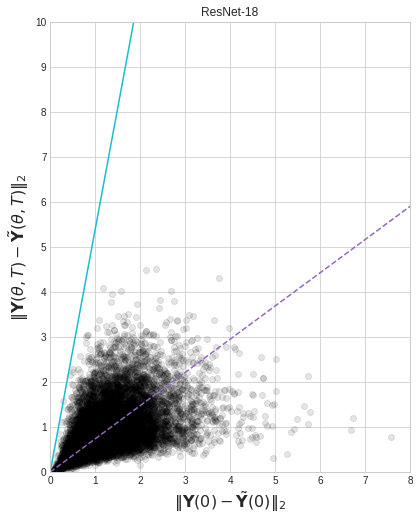

In [ ]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
ax.scatter(norms2['y0_diff'],norms2['y_diff'],color='black',alpha=0.1)

ax.plot(x,yfit2,color='tab:cyan')
ax.plot(x,yfit2m,'--',color='tab:purple')
ax.set_xlabel(r'$\Vert \mathbf{Y}(0)-\mathbf{\tilde{Y}}(0)\Vert_2$',fontfamily='serif', fontsize=14)
ax.set_ylabel(r'$\Vert \mathbf{Y}(\theta,T)-\mathbf{\tilde{Y}}(\theta,T)\Vert_2$',fontfamily='serif', fontsize=14)
ax.set_title("ResNet-18",fontsize=14)
ax.set_yticks(major_ticks)
ax.set_xticks(major_ticks)
ax.set_aspect(1)

plt.ylim([0,10])
plt.xlim([0,8])
plt.show()

In [ ]:
print(gradient1)
print(gradient2)
print(gradient3)
print(gradient4)

8.374267139467497
1.5632932602395373
5.387426625874923
0.7383633245525593


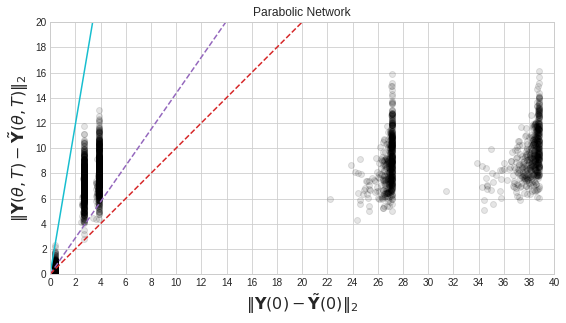

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.scatter(norms3['y0_diff'],norms3['y_diff'],color='black',alpha=0.1)

ax.plot(x,yfit3,color='tab:cyan')
ax.plot(x,yfit3m,'--',color='tab:purple')
ax.plot(x,x,'--',color='tab:red')
ax.set_xlabel(r'$\Vert \mathbf{Y}(0)-\mathbf{\tilde{Y}}(0)\Vert_2$',fontfamily='serif', fontsize=16)
ax.set_ylabel(r'$\Vert \mathbf{Y}(\theta,T)-\mathbf{\tilde{Y}}(\theta,T)\Vert_2$',fontfamily='serif', fontsize=16)
ax.set_title("Parabolic Network",fontsize=14)
ax.set_yticks(major_ticks*2)
ax.set_xticks(major_ticks*2)
ax.set_aspect(1)

plt.ylim([0,20])
plt.xlim([0,40])
plt.show()

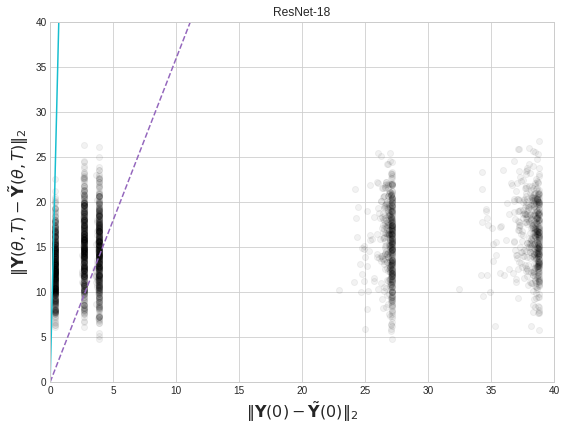

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.scatter(norms4['y0_diff'],norms4['y_diff'],color='black',alpha=0.05)

ax.plot(x,yfit4,color='tab:cyan')
ax.plot(x,yfit4m,'--',color='tab:purple')
ax.set_xlabel(r'$\Vert \mathbf{Y}(0)-\mathbf{\tilde{Y}}(0)\Vert_2$',fontfamily='serif', fontsize=16)
ax.set_ylabel(r'$\Vert \mathbf{Y}(\theta,T)-\mathbf{\tilde{Y}}(\theta,T)\Vert_2$',fontfamily='serif', fontsize=16)
ax.set_title("ResNet-18",fontsize=14)
ax.set_yticks(major_ticks*5)
ax.set_xticks(major_ticks*5)

plt.ylim([0,40])
plt.xlim([0,40])
plt.show()

In [10]:
fgsm_resnet = fgsm_acc[fgsm_acc['model']=='resnet']
fgsm_parabolic = fgsm_acc[fgsm_acc['model'] == 'parabolic']

In [20]:
two_ticks = [0,2**(-7),2**(-6),2**(-5),2**(-4),2**(-3),2**(-2),2**(-1)]

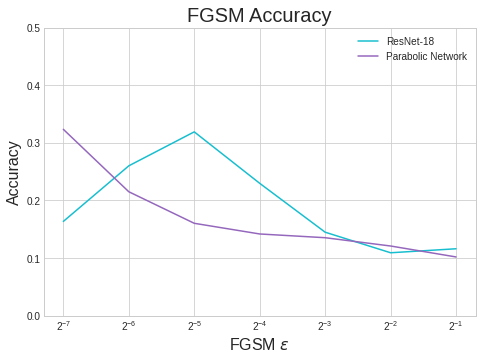

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(fgsm_resnet['eps'],fgsm_resnet['acc'],color='tab:cyan',label='ResNet-18')
ax.plot(fgsm_parabolic['eps'],fgsm_parabolic['acc'],color='tab:purple', label='Parabolic Network')
ax.set_xlabel(r'FGSM $\epsilon$', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title("FGSM Accuracy",fontsize=20)

plt.ylim([0,0.5])
ax.legend()
ax.set_xscale('log',basex=2)
plt.show()